In [1]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import l2
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    #file_name = 'csvFile_2021_04_28'
    file_name = 'csvFile_2021_05_13'
    #file_name = 'DLTemLongerDatasetDischargecsvFile_2021_05_20'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath


In [3]:
file()

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/csvFile_2021_05_13.csv'

In [4]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [5]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [6]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [7]:
df_gross

,id,dateTime,Tamb,TtopTestTankHPCir,TbottomTestTankHpCir,TtopSourceTank,TloadTankMix,TTopTestTankLoadCir,TloadMix,TbottomSourceTank,...,timeStamp_Temp,timeStamp_watt,entropy_kJ/K,entropy_kJ,nStratCharging,TotalTanksEnergyForAvailability_kJ,DisEntropy_kj/K,DisEntropy_kj,nStratDischarge,DisTotalTanksEnergyForAvailability_kJ
0,601,2021-05-13 10:32:07,23.6036,29.1872,25.3284,20.6632,24.5504,29.2211,25.8021,17.3542,...,0.000556,0.000556,7.480020,160.350068,-4282.277324,47305.966266,41.970253,913.639944,-0.905175,80166.107204
1,605,2021-05-13 10:32:14,23.6036,29.1872,25.2946,20.6294,24.5843,29.2549,25.8359,17.4217,...,0.001944,0.001667,8.790578,192.991651,-2608.135096,47269.060429,47.659192,1003.144654,-0.172077,80141.432179
2,609,2021-05-13 10:32:20,23.5698,29.1872,25.2608,20.6294,24.5843,29.2211,25.7682,17.3542,...,0.001667,0.001944,-8.088882,-174.129072,16.790194,47263.732414,58.083490,1223.768039,0.218818,80095.704814
3,612,2021-05-13 10:32:25,23.5698,29.2211,25.3623,20.6632,24.5843,29.2888,25.8021,17.3542,...,0.001389,0.001389,-59.863169,-1304.618069,83.501866,47247.877155,61.292859,1310.358646,0.399977,80090.528800
4,615,2021-05-13 10:32:30,23.6036,28.8824,25.6329,20.4943,24.6181,29.2888,25.7682,17.4892,...,0.001389,0.001667,-95.682467,-2019.570772,152.300226,47189.825766,66.818207,1435.843911,0.521984,80017.475276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,4613,2021-05-13 12:23:30,24.5843,28.8485,22.1838,20.0214,33.7625,41.4020,34.9158,16.2406,...,0.001667,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,4617,2021-05-13 12:23:37,24.6181,28.7808,22.1500,20.0552,33.7286,40.6543,34.9158,16.2744,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,4622,2021-05-13 12:23:45,24.6181,28.7469,22.1838,20.0214,33.7286,40.1785,34.8819,16.2406,...,0.002222,0.002222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,4626,2021-05-13 12:23:52,24.6519,28.6453,22.2176,20.0214,33.7625,39.8048,34.8140,16.2406,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

def charging_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    return df_all.dropna()

chargingIn_df = charging_df(df_gross)

In [9]:
chargingIn_df

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,27.0880,28.1374,28.8824,29.4920,29.4581,29.4243,29.4581,29.6275,29.6953,29.3904
1,27.0880,28.1036,28.8824,29.4920,29.3904,29.6953,29.4581,29.5936,29.5598,29.4581
2,27.0880,28.1036,28.8824,29.4920,29.4243,29.5598,29.4243,29.4243,29.5598,29.4581
3,27.0203,28.1036,28.8824,29.4243,29.3904,29.4243,29.4243,29.5598,29.6275,29.4581
4,27.0542,28.1036,28.8824,29.4581,29.3565,29.5598,29.4243,29.4920,29.6275,29.4243
...,...,...,...,...,...,...,...,...,...,...
1041,22.0148,22.3866,22.5556,22.6570,22.5218,22.8260,22.7584,23.0964,25.5652,41.6740
1042,22.0486,22.4204,22.5894,22.7246,22.5556,22.8260,22.7922,23.0964,25.5991,41.7079
1043,22.0148,22.4542,22.5556,22.7246,22.5894,22.8260,22.8260,23.0964,25.3623,41.6060
1044,22.0486,22.4880,22.5894,22.7246,22.5894,22.8598,22.8260,23.0964,25.0240,41.1981


In [14]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(chargingIn_df)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = chargingIn_df.columns
#df_nrm.shape

In [15]:
df_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,0.322446,0.223743,0.248316,0.259075,0.255416,0.245030,0.234013,0.220075,0.174386,0.008528
1,0.322446,0.222602,0.248316,0.259075,0.253231,0.253792,0.234013,0.218956,0.169638,0.011370
2,0.322446,0.222602,0.248316,0.259075,0.254325,0.249411,0.232915,0.213367,0.169638,0.011370
3,0.318580,0.222602,0.248316,0.256868,0.253231,0.245030,0.232915,0.217840,0.172010,0.011370
4,0.320516,0.222602,0.248316,0.257970,0.252137,0.249411,0.232915,0.215602,0.172010,0.009951
...,...,...,...,...,...,...,...,...,...,...
1041,0.032800,0.029656,0.038168,0.036344,0.031622,0.031692,0.016463,0.004463,0.029636,0.524076
1042,0.034730,0.030796,0.039291,0.038547,0.032713,0.031692,0.017561,0.004463,0.030824,0.525499
1043,0.032800,0.031937,0.038168,0.038547,0.033803,0.031692,0.018658,0.004463,0.022525,0.521222
1044,0.034730,0.033078,0.039291,0.038547,0.033803,0.032785,0.018658,0.004463,0.010668,0.504103


In [16]:

#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



In [27]:
k = 3
epochs =2000
batch_size = 50
n_features = 10
#n_features = 10 is 10 when, input in 10 columns temperature

In [28]:

Xdf1, ydf1 = prepare_df(df_nrm)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1043, 30)

In [29]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [30]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [31]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.1, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [32]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [33]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(32, input_shape = (time_steps, n_features), kernel_regularizer=l2(0.01), \
                   recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    #model.add(LSTM(64))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [34]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyTemTForGitFigures.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [35]:
X_train.shape
y_train.shape

(938, 10)

In [36]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)


Train on 656 samples, validate on 282 samples
Epoch 1/2000
656/656 [==============================] - 1s 2ms/step - loss: 1.2566 - accuracy: 0.1875 - val_loss: 0.9414 - val_accuracy: 0.0000e+00
Epoch 2/2000
656/656 [==============================] - 0s 256us/step - loss: 0.9867 - accuracy: 0.1677 - val_loss: 0.8339 - val_accuracy: 0.0000e+00
Epoch 3/2000
656/656 [==============================] - 0s 271us/step - loss: 0.7905 - accuracy: 0.1296 - val_loss: 0.7552 - val_accuracy: 0.0000e+00
Epoch 4/2000
656/656 [==============================] - 0s 249us/step - loss: 0.6635 - accuracy: 0.1143 - val_loss: 0.6915 - val_accuracy: 0.0000e+00
Epoch 5/2000
656/656 [==============================] - 0s 232us/step - loss: 0.5832 - accuracy: 0.1280 - val_loss: 0.6282 - val_accuracy: 0.0000e+00
Epoch 6/2000
656/656 [==============================] - 0s 349us/step - loss: 0.5253 - accuracy: 0.1098 - val_loss: 0.5739 - val_accuracy: 0.0000e+00
Epoch 7/2000
656/656 [==============================] - 

656/656 [==============================] - 0s 318us/step - loss: 0.0693 - accuracy: 0.2805 - val_loss: 0.1465 - val_accuracy: 0.0000e+00
Epoch 56/2000
656/656 [==============================] - 0s 482us/step - loss: 0.0655 - accuracy: 0.2927 - val_loss: 0.1439 - val_accuracy: 0.0000e+00
Epoch 57/2000
656/656 [==============================] - 0s 268us/step - loss: 0.0643 - accuracy: 0.3064 - val_loss: 0.1421 - val_accuracy: 0.0000e+00
Epoch 58/2000
656/656 [==============================] - 0s 236us/step - loss: 0.0618 - accuracy: 0.2485 - val_loss: 0.1395 - val_accuracy: 0.0000e+00
Epoch 59/2000
656/656 [==============================] - 0s 266us/step - loss: 0.0595 - accuracy: 0.3140 - val_loss: 0.1386 - val_accuracy: 0.0000e+00
Epoch 60/2000
656/656 [==============================] - 0s 236us/step - loss: 0.0578 - accuracy: 0.2805 - val_loss: 0.1360 - val_accuracy: 0.0000e+00
Epoch 61/2000
656/656 [==============================] - 0s 305us/step - loss: 0.0553 - accuracy: 0.2957 - v

656/656 [==============================] - 0s 242us/step - loss: 0.0168 - accuracy: 0.3826 - val_loss: 0.1035 - val_accuracy: 0.0000e+00
Epoch 110/2000
656/656 [==============================] - 0s 272us/step - loss: 0.0172 - accuracy: 0.3399 - val_loss: 0.1024 - val_accuracy: 0.0000e+00
Epoch 111/2000
656/656 [==============================] - 0s 469us/step - loss: 0.0164 - accuracy: 0.3445 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 112/2000
656/656 [==============================] - 0s 343us/step - loss: 0.0168 - accuracy: 0.3689 - val_loss: 0.1016 - val_accuracy: 0.0000e+00
Epoch 113/2000
656/656 [==============================] - 0s 378us/step - loss: 0.0164 - accuracy: 0.3811 - val_loss: 0.1014 - val_accuracy: 0.0000e+00
Epoch 114/2000
656/656 [==============================] - 0s 448us/step - loss: 0.0155 - accuracy: 0.3735 - val_loss: 0.1035 - val_accuracy: 0.0000e+00
Epoch 115/2000
656/656 [==============================] - 0s 287us/step - loss: 0.0163 - accuracy: 0.35

Epoch 163/2000
656/656 [==============================] - 0s 219us/step - loss: 0.0125 - accuracy: 0.3902 - val_loss: 0.1024 - val_accuracy: 0.0000e+00
Epoch 164/2000
656/656 [==============================] - 0s 223us/step - loss: 0.0117 - accuracy: 0.3552 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 165/2000
656/656 [==============================] - 0s 206us/step - loss: 0.0117 - accuracy: 0.3780 - val_loss: 0.1036 - val_accuracy: 0.0000e+00
Epoch 166/2000
656/656 [==============================] - 0s 263us/step - loss: 0.0118 - accuracy: 0.3659 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 167/2000
656/656 [==============================] - 0s 254us/step - loss: 0.0117 - accuracy: 0.3841 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 168/2000
656/656 [==============================] - 0s 337us/step - loss: 0.0115 - accuracy: 0.3841 - val_loss: 0.1020 - val_accuracy: 0.0000e+00
Epoch 169/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0115 -

Epoch 217/2000
656/656 [==============================] - 0s 356us/step - loss: 0.0101 - accuracy: 0.3750 - val_loss: 0.1035 - val_accuracy: 0.0000e+00
Epoch 218/2000
656/656 [==============================] - 0s 267us/step - loss: 0.0099 - accuracy: 0.3857 - val_loss: 0.1011 - val_accuracy: 0.0000e+00
Epoch 219/2000
656/656 [==============================] - 0s 354us/step - loss: 0.0105 - accuracy: 0.4024 - val_loss: 0.1008 - val_accuracy: 0.0000e+00
Epoch 220/2000
656/656 [==============================] - 0s 277us/step - loss: 0.0102 - accuracy: 0.3841 - val_loss: 0.1009 - val_accuracy: 0.0000e+00
Epoch 221/2000
656/656 [==============================] - 0s 268us/step - loss: 0.0098 - accuracy: 0.3887 - val_loss: 0.1038 - val_accuracy: 0.0000e+00
Epoch 222/2000
656/656 [==============================] - 0s 287us/step - loss: 0.0095 - accuracy: 0.3613 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 223/2000
656/656 [==============================] - 0s 322us/step - loss: 0.0100 -

Epoch 271/2000
656/656 [==============================] - 0s 200us/step - loss: 0.0086 - accuracy: 0.3841 - val_loss: 0.1036 - val_accuracy: 0.0000e+00
Epoch 272/2000
656/656 [==============================] - 0s 265us/step - loss: 0.0090 - accuracy: 0.3963 - val_loss: 0.1018 - val_accuracy: 0.0000e+00
Epoch 273/2000
656/656 [==============================] - 0s 187us/step - loss: 0.0086 - accuracy: 0.3735 - val_loss: 0.1025 - val_accuracy: 0.0000e+00
Epoch 274/2000
656/656 [==============================] - 0s 175us/step - loss: 0.0090 - accuracy: 0.4085 - val_loss: 0.1040 - val_accuracy: 0.0000e+00
Epoch 275/2000
656/656 [==============================] - 0s 193us/step - loss: 0.0087 - accuracy: 0.3582 - val_loss: 0.1040 - val_accuracy: 0.0000e+00
Epoch 276/2000
656/656 [==============================] - 0s 214us/step - loss: 0.0085 - accuracy: 0.4024 - val_loss: 0.1040 - val_accuracy: 0.0000e+00
Epoch 277/2000
656/656 [==============================] - 0s 352us/step - loss: 0.0085 -

Epoch 325/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0078 - accuracy: 0.3979 - val_loss: 0.1034 - val_accuracy: 0.0000e+00
Epoch 326/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0080 - accuracy: 0.3796 - val_loss: 0.1030 - val_accuracy: 0.0000e+00
Epoch 327/2000
656/656 [==============================] - 0s 344us/step - loss: 0.0080 - accuracy: 0.3918 - val_loss: 0.1051 - val_accuracy: 0.0000e+00
Epoch 328/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0076 - accuracy: 0.3979 - val_loss: 0.1031 - val_accuracy: 0.0000e+00
Epoch 329/2000
656/656 [==============================] - 0s 261us/step - loss: 0.0075 - accuracy: 0.4116 - val_loss: 0.1034 - val_accuracy: 0.0000e+00
Epoch 330/2000
656/656 [==============================] - 0s 273us/step - loss: 0.0078 - accuracy: 0.3826 - val_loss: 0.1029 - val_accuracy: 0.0000e+00
Epoch 331/2000
656/656 [==============================] - 0s 254us/step - loss: 0.0081 -

Epoch 379/2000
656/656 [==============================] - 0s 281us/step - loss: 0.0075 - accuracy: 0.3750 - val_loss: 0.1020 - val_accuracy: 0.0000e+00
Epoch 380/2000
656/656 [==============================] - 0s 299us/step - loss: 0.0071 - accuracy: 0.3963 - val_loss: 0.1029 - val_accuracy: 0.0000e+00
Epoch 381/2000
656/656 [==============================] - 0s 296us/step - loss: 0.0072 - accuracy: 0.3826 - val_loss: 0.1035 - val_accuracy: 0.0000e+00
Epoch 382/2000
656/656 [==============================] - 0s 352us/step - loss: 0.0070 - accuracy: 0.3826 - val_loss: 0.1036 - val_accuracy: 0.0000e+00
Epoch 383/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0074 - accuracy: 0.3933 - val_loss: 0.1007 - val_accuracy: 0.0000e+00
Epoch 384/2000
656/656 [==============================] - 0s 240us/step - loss: 0.0072 - accuracy: 0.4101 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 385/2000
656/656 [==============================] - 0s 389us/step - loss: 0.0074 -

Epoch 433/2000
656/656 [==============================] - 0s 485us/step - loss: 0.0065 - accuracy: 0.3948 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 434/2000
656/656 [==============================] - 0s 285us/step - loss: 0.0064 - accuracy: 0.4268 - val_loss: 0.1013 - val_accuracy: 0.0000e+00
Epoch 435/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0063 - accuracy: 0.4268 - val_loss: 0.1031 - val_accuracy: 0.0000e+00
Epoch 436/2000
656/656 [==============================] - 0s 398us/step - loss: 0.0063 - accuracy: 0.3720 - val_loss: 0.1044 - val_accuracy: 0.0000e+00
Epoch 437/2000
656/656 [==============================] - 0s 314us/step - loss: 0.0062 - accuracy: 0.4192 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 438/2000
656/656 [==============================] - 0s 353us/step - loss: 0.0064 - accuracy: 0.3933 - val_loss: 0.1024 - val_accuracy: 0.0000e+00
Epoch 439/2000
656/656 [==============================] - 0s 273us/step - loss: 0.0065 -

Epoch 487/2000
656/656 [==============================] - 0s 185us/step - loss: 0.0062 - accuracy: 0.3872 - val_loss: 0.1009 - val_accuracy: 0.0000e+00
Epoch 488/2000
656/656 [==============================] - 0s 190us/step - loss: 0.0064 - accuracy: 0.3948 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 489/2000
656/656 [==============================] - 0s 192us/step - loss: 0.0061 - accuracy: 0.4284 - val_loss: 0.1030 - val_accuracy: 0.0000e+00
Epoch 490/2000
656/656 [==============================] - 0s 235us/step - loss: 0.0060 - accuracy: 0.3765 - val_loss: 0.1032 - val_accuracy: 0.0000e+00
Epoch 491/2000
656/656 [==============================] - 0s 189us/step - loss: 0.0062 - accuracy: 0.4101 - val_loss: 0.1014 - val_accuracy: 0.0000e+00
Epoch 492/2000
656/656 [==============================] - 0s 182us/step - loss: 0.0061 - accuracy: 0.4055 - val_loss: 0.1023 - val_accuracy: 0.0000e+00
Epoch 493/2000
656/656 [==============================] - 0s 183us/step - loss: 0.0061 -

Epoch 541/2000
656/656 [==============================] - 0s 170us/step - loss: 0.0059 - accuracy: 0.4055 - val_loss: 0.1036 - val_accuracy: 0.0000e+00
Epoch 542/2000
656/656 [==============================] - 0s 201us/step - loss: 0.0060 - accuracy: 0.4040 - val_loss: 0.1005 - val_accuracy: 0.0000e+00
Epoch 543/2000
656/656 [==============================] - 0s 172us/step - loss: 0.0059 - accuracy: 0.4116 - val_loss: 0.1040 - val_accuracy: 0.0000e+00
Epoch 544/2000
656/656 [==============================] - 0s 175us/step - loss: 0.0057 - accuracy: 0.3841 - val_loss: 0.1020 - val_accuracy: 0.0000e+00
Epoch 545/2000
656/656 [==============================] - 0s 179us/step - loss: 0.0056 - accuracy: 0.4390 - val_loss: 0.1015 - val_accuracy: 0.0000e+00
Epoch 546/2000
656/656 [==============================] - 0s 325us/step - loss: 0.0057 - accuracy: 0.3902 - val_loss: 0.1041 - val_accuracy: 0.0000e+00
Epoch 547/2000
656/656 [==============================] - 0s 198us/step - loss: 0.0054 -

Epoch 595/2000
656/656 [==============================] - 0s 207us/step - loss: 0.0052 - accuracy: 0.4024 - val_loss: 0.1037 - val_accuracy: 0.0000e+00
Epoch 596/2000
656/656 [==============================] - 0s 257us/step - loss: 0.0057 - accuracy: 0.4116 - val_loss: 0.1038 - val_accuracy: 0.0000e+00
Epoch 597/2000
656/656 [==============================] - 0s 223us/step - loss: 0.0055 - accuracy: 0.3872 - val_loss: 0.0997 - val_accuracy: 0.0000e+00
Epoch 598/2000
656/656 [==============================] - 0s 194us/step - loss: 0.0062 - accuracy: 0.3902 - val_loss: 0.1009 - val_accuracy: 0.0000e+00
Epoch 599/2000
656/656 [==============================] - 0s 274us/step - loss: 0.0056 - accuracy: 0.3994 - val_loss: 0.1028 - val_accuracy: 0.0000e+00
Epoch 600/2000
656/656 [==============================] - 0s 235us/step - loss: 0.0054 - accuracy: 0.4085 - val_loss: 0.1017 - val_accuracy: 0.0000e+00
Epoch 601/2000
656/656 [==============================] - 0s 175us/step - loss: 0.0053 -

Epoch 649/2000
656/656 [==============================] - 0s 282us/step - loss: 0.0050 - accuracy: 0.4360 - val_loss: 0.0991 - val_accuracy: 0.0000e+00
Epoch 650/2000
656/656 [==============================] - 0s 214us/step - loss: 0.0053 - accuracy: 0.4177 - val_loss: 0.1041 - val_accuracy: 0.0035
Epoch 651/2000
656/656 [==============================] - 0s 178us/step - loss: 0.0052 - accuracy: 0.4040 - val_loss: 0.1028 - val_accuracy: 0.0000e+00
Epoch 652/2000
656/656 [==============================] - 0s 208us/step - loss: 0.0053 - accuracy: 0.4345 - val_loss: 0.1030 - val_accuracy: 0.0000e+00
Epoch 653/2000
656/656 [==============================] - 0s 184us/step - loss: 0.0052 - accuracy: 0.3857 - val_loss: 0.1020 - val_accuracy: 0.0071
Epoch 654/2000
656/656 [==============================] - 0s 189us/step - loss: 0.0054 - accuracy: 0.4116 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 655/2000
656/656 [==============================] - 0s 183us/step - loss: 0.0052 - accurac

656/656 [==============================] - 0s 602us/step - loss: 0.0049 - accuracy: 0.4284 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 704/2000
656/656 [==============================] - 0s 446us/step - loss: 0.0047 - accuracy: 0.4390 - val_loss: 0.0988 - val_accuracy: 0.0000e+00
Epoch 705/2000
656/656 [==============================] - 0s 436us/step - loss: 0.0048 - accuracy: 0.4299 - val_loss: 0.0989 - val_accuracy: 0.0000e+00
Epoch 706/2000
656/656 [==============================] - 0s 339us/step - loss: 0.0045 - accuracy: 0.4497 - val_loss: 0.0997 - val_accuracy: 0.0000e+00
Epoch 707/2000
656/656 [==============================] - 0s 546us/step - loss: 0.0050 - accuracy: 0.3765 - val_loss: 0.0990 - val_accuracy: 0.0000e+00
Epoch 708/2000
656/656 [==============================] - 0s 356us/step - loss: 0.0048 - accuracy: 0.3811 - val_loss: 0.1020 - val_accuracy: 0.0000e+00
Epoch 709/2000
656/656 [==============================] - 0s 412us/step - loss: 0.0050 - accuracy: 0.44

656/656 [==============================] - 0s 287us/step - loss: 0.0045 - accuracy: 0.4375 - val_loss: 0.0979 - val_accuracy: 0.0000e+00
Epoch 758/2000
656/656 [==============================] - 0s 280us/step - loss: 0.0045 - accuracy: 0.4710 - val_loss: 0.0975 - val_accuracy: 0.0000e+00
Epoch 759/2000
656/656 [==============================] - 0s 242us/step - loss: 0.0045 - accuracy: 0.4360 - val_loss: 0.0990 - val_accuracy: 0.0000e+00
Epoch 760/2000
656/656 [==============================] - 0s 277us/step - loss: 0.0046 - accuracy: 0.4299 - val_loss: 0.0972 - val_accuracy: 0.0000e+00
Epoch 761/2000
656/656 [==============================] - 0s 278us/step - loss: 0.0044 - accuracy: 0.4146 - val_loss: 0.0977 - val_accuracy: 0.0000e+00
Epoch 762/2000
656/656 [==============================] - 0s 284us/step - loss: 0.0045 - accuracy: 0.4375 - val_loss: 0.0972 - val_accuracy: 0.0000e+00
Epoch 763/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0044 - accuracy: 0.43

656/656 [==============================] - 0s 433us/step - loss: 0.0045 - accuracy: 0.4634 - val_loss: 0.1003 - val_accuracy: 0.0106
Epoch 812/2000
656/656 [==============================] - 0s 315us/step - loss: 0.0043 - accuracy: 0.4558 - val_loss: 0.0992 - val_accuracy: 0.0000e+00
Epoch 813/2000
656/656 [==============================] - 0s 275us/step - loss: 0.0044 - accuracy: 0.4177 - val_loss: 0.0965 - val_accuracy: 0.0000e+00
Epoch 814/2000
656/656 [==============================] - 0s 295us/step - loss: 0.0042 - accuracy: 0.4421 - val_loss: 0.0962 - val_accuracy: 0.0000e+00
Epoch 815/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0043 - accuracy: 0.4055 - val_loss: 0.0959 - val_accuracy: 0.0000e+00
Epoch 816/2000
656/656 [==============================] - 0s 225us/step - loss: 0.0042 - accuracy: 0.4527 - val_loss: 0.0978 - val_accuracy: 0.0000e+00
Epoch 817/2000
656/656 [==============================] - 0s 240us/step - loss: 0.0043 - accuracy: 0.4939 -

656/656 [==============================] - 0s 300us/step - loss: 0.0043 - accuracy: 0.4482 - val_loss: 0.0980 - val_accuracy: 0.0000e+00
Epoch 866/2000
656/656 [==============================] - 0s 250us/step - loss: 0.0040 - accuracy: 0.4832 - val_loss: 0.0971 - val_accuracy: 0.0000e+00
Epoch 867/2000
656/656 [==============================] - 0s 233us/step - loss: 0.0041 - accuracy: 0.4604 - val_loss: 0.0947 - val_accuracy: 0.0000e+00
Epoch 868/2000
656/656 [==============================] - 0s 237us/step - loss: 0.0040 - accuracy: 0.4466 - val_loss: 0.0944 - val_accuracy: 0.0000e+00
Epoch 869/2000
656/656 [==============================] - 0s 237us/step - loss: 0.0043 - accuracy: 0.4604 - val_loss: 0.0955 - val_accuracy: 0.0000e+00
Epoch 870/2000
656/656 [==============================] - 0s 257us/step - loss: 0.0042 - accuracy: 0.4390 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 871/2000
656/656 [==============================] - 0s 198us/step - loss: 0.0040 - accuracy: 0.46

656/656 [==============================] - 0s 334us/step - loss: 0.0040 - accuracy: 0.4421 - val_loss: 0.0967 - val_accuracy: 0.0071
Epoch 920/2000
656/656 [==============================] - 0s 310us/step - loss: 0.0041 - accuracy: 0.4466 - val_loss: 0.0941 - val_accuracy: 0.0000e+00
Epoch 921/2000
656/656 [==============================] - 0s 254us/step - loss: 0.0038 - accuracy: 0.4558 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 922/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0041 - accuracy: 0.4665 - val_loss: 0.0939 - val_accuracy: 0.0000e+00
Epoch 923/2000
656/656 [==============================] - 0s 238us/step - loss: 0.0039 - accuracy: 0.4253 - val_loss: 0.0939 - val_accuracy: 0.0000e+00
Epoch 924/2000
656/656 [==============================] - 0s 231us/step - loss: 0.0038 - accuracy: 0.4421 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 925/2000
656/656 [==============================] - 0s 224us/step - loss: 0.0040 - accuracy: 0.4649 -

656/656 [==============================] - 0s 214us/step - loss: 0.0038 - accuracy: 0.4588 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 974/2000
656/656 [==============================] - 0s 230us/step - loss: 0.0038 - accuracy: 0.4802 - val_loss: 0.0936 - val_accuracy: 0.0000e+00
Epoch 975/2000
656/656 [==============================] - 0s 194us/step - loss: 0.0038 - accuracy: 0.4878 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 976/2000
656/656 [==============================] - 0s 211us/step - loss: 0.0040 - accuracy: 0.4665 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 977/2000
656/656 [==============================] - 0s 208us/step - loss: 0.0039 - accuracy: 0.4771 - val_loss: 0.0912 - val_accuracy: 0.0000e+00
Epoch 978/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0042 - accuracy: 0.4665 - val_loss: 0.0963 - val_accuracy: 0.0000e+00
Epoch 979/2000
656/656 [==============================] - 0s 256us/step - loss: 0.0041 - accuracy: 0.44

Epoch 1027/2000
656/656 [==============================] - 0s 317us/step - loss: 0.0043 - accuracy: 0.4131 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 1028/2000
656/656 [==============================] - 0s 270us/step - loss: 0.0040 - accuracy: 0.4924 - val_loss: 0.0914 - val_accuracy: 0.0000e+00
Epoch 1029/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0044 - accuracy: 0.4909 - val_loss: 0.0923 - val_accuracy: 0.0000e+00
Epoch 1030/2000
656/656 [==============================] - 0s 259us/step - loss: 0.0038 - accuracy: 0.4695 - val_loss: 0.0919 - val_accuracy: 0.0000e+00
Epoch 1031/2000
656/656 [==============================] - 0s 258us/step - loss: 0.0038 - accuracy: 0.4497 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 1032/2000
656/656 [==============================] - 0s 238us/step - loss: 0.0039 - accuracy: 0.4985 - val_loss: 0.0917 - val_accuracy: 0.0000e+00
Epoch 1033/2000
656/656 [==============================] - 0s 277us/step - loss: 0

656/656 [==============================] - 0s 278us/step - loss: 0.0037 - accuracy: 0.4909 - val_loss: 0.0918 - val_accuracy: 0.0000e+00
Epoch 1081/2000
656/656 [==============================] - 0s 251us/step - loss: 0.0042 - accuracy: 0.4710 - val_loss: 0.0918 - val_accuracy: 0.0000e+00
Epoch 1082/2000
656/656 [==============================] - 0s 228us/step - loss: 0.0041 - accuracy: 0.4665 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1083/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0037 - accuracy: 0.4482 - val_loss: 0.0955 - val_accuracy: 0.0000e+00
Epoch 1084/2000
656/656 [==============================] - 0s 235us/step - loss: 0.0036 - accuracy: 0.4588 - val_loss: 0.0932 - val_accuracy: 0.0000e+00
Epoch 1085/2000
656/656 [==============================] - 0s 255us/step - loss: 0.0038 - accuracy: 0.4695 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 1086/2000
656/656 [==============================] - 0s 265us/step - loss: 0.0038 - accuracy

Epoch 1134/2000
656/656 [==============================] - 0s 288us/step - loss: 0.0037 - accuracy: 0.4985 - val_loss: 0.0924 - val_accuracy: 0.0000e+00
Epoch 1135/2000
656/656 [==============================] - 0s 265us/step - loss: 0.0036 - accuracy: 0.4924 - val_loss: 0.0939 - val_accuracy: 0.0000e+00
Epoch 1136/2000
656/656 [==============================] - 0s 257us/step - loss: 0.0038 - accuracy: 0.4436 - val_loss: 0.0960 - val_accuracy: 0.0000e+00
Epoch 1137/2000
656/656 [==============================] - 0s 255us/step - loss: 0.0039 - accuracy: 0.4527 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 1138/2000
656/656 [==============================] - 0s 279us/step - loss: 0.0048 - accuracy: 0.4726 - val_loss: 0.0926 - val_accuracy: 0.0000e+00
Epoch 1139/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0037 - accuracy: 0.4482 - val_loss: 0.0921 - val_accuracy: 0.0000e+00
Epoch 1140/2000
656/656 [==============================] - 0s 279us/step - loss: 0

656/656 [==============================] - 0s 256us/step - loss: 0.0037 - accuracy: 0.4848 - val_loss: 0.0959 - val_accuracy: 0.0000e+00
Epoch 1188/2000
656/656 [==============================] - 0s 271us/step - loss: 0.0035 - accuracy: 0.4710 - val_loss: 0.0944 - val_accuracy: 0.0000e+00
Epoch 1189/2000
656/656 [==============================] - 0s 280us/step - loss: 0.0034 - accuracy: 0.4802 - val_loss: 0.0935 - val_accuracy: 0.0000e+00
Epoch 1190/2000
656/656 [==============================] - 0s 289us/step - loss: 0.0038 - accuracy: 0.4649 - val_loss: 0.0945 - val_accuracy: 0.0000e+00
Epoch 1191/2000
656/656 [==============================] - 0s 263us/step - loss: 0.0036 - accuracy: 0.4756 - val_loss: 0.0935 - val_accuracy: 0.0000e+00
Epoch 1192/2000
656/656 [==============================] - 0s 236us/step - loss: 0.0038 - accuracy: 0.4512 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 1193/2000
656/656 [==============================] - 0s 224us/step - loss: 0.0036 - accuracy

Epoch 1241/2000
656/656 [==============================] - 0s 285us/step - loss: 0.0040 - accuracy: 0.4741 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 1242/2000
656/656 [==============================] - 0s 300us/step - loss: 0.0035 - accuracy: 0.4573 - val_loss: 0.0929 - val_accuracy: 0.0000e+00
Epoch 1243/2000
656/656 [==============================] - 0s 289us/step - loss: 0.0034 - accuracy: 0.4710 - val_loss: 0.0952 - val_accuracy: 0.0000e+00
Epoch 1244/2000
656/656 [==============================] - 0s 266us/step - loss: 0.0035 - accuracy: 0.4726 - val_loss: 0.0951 - val_accuracy: 0.0000e+00
Epoch 1245/2000
656/656 [==============================] - 0s 275us/step - loss: 0.0036 - accuracy: 0.4466 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 1246/2000
656/656 [==============================] - 0s 245us/step - loss: 0.0033 - accuracy: 0.4634 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 1247/2000
656/656 [==============================] - 0s 251us/step - loss: 0

656/656 [==============================] - 0s 335us/step - loss: 0.0034 - accuracy: 0.4345 - val_loss: 0.0923 - val_accuracy: 0.0000e+00
Epoch 1295/2000
656/656 [==============================] - 0s 250us/step - loss: 0.0037 - accuracy: 0.4985 - val_loss: 0.0922 - val_accuracy: 0.0000e+00
Epoch 1296/2000
656/656 [==============================] - 0s 256us/step - loss: 0.0039 - accuracy: 0.4588 - val_loss: 0.0956 - val_accuracy: 0.0000e+00
Epoch 1297/2000
656/656 [==============================] - 0s 336us/step - loss: 0.0036 - accuracy: 0.4482 - val_loss: 0.0912 - val_accuracy: 0.0000e+00
Epoch 1298/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0034 - accuracy: 0.4802 - val_loss: 0.0949 - val_accuracy: 0.0000e+00
Epoch 1299/2000
656/656 [==============================] - 0s 244us/step - loss: 0.0034 - accuracy: 0.4939 - val_loss: 0.0913 - val_accuracy: 0.0000e+00
Epoch 1300/2000
656/656 [==============================] - 0s 252us/step - loss: 0.0039 - accuracy

Epoch 1348/2000
656/656 [==============================] - 0s 275us/step - loss: 0.0034 - accuracy: 0.4436 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 1349/2000
656/656 [==============================] - 0s 267us/step - loss: 0.0036 - accuracy: 0.4680 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 1350/2000
656/656 [==============================] - 0s 305us/step - loss: 0.0034 - accuracy: 0.4436 - val_loss: 0.0963 - val_accuracy: 0.0000e+00
Epoch 1351/2000
656/656 [==============================] - 0s 235us/step - loss: 0.0035 - accuracy: 0.4390 - val_loss: 0.0934 - val_accuracy: 0.0000e+00
Epoch 1352/2000
656/656 [==============================] - 0s 255us/step - loss: 0.0035 - accuracy: 0.4466 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 1353/2000
656/656 [==============================] - 0s 236us/step - loss: 0.0034 - accuracy: 0.4756 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 1354/2000
656/656 [==============================] - 0s 257us/step - loss: 0

656/656 [==============================] - 0s 281us/step - loss: 0.0036 - accuracy: 0.4756 - val_loss: 0.0939 - val_accuracy: 0.0000e+00
Epoch 1402/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0034 - accuracy: 0.4863 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 1403/2000
656/656 [==============================] - 0s 269us/step - loss: 0.0034 - accuracy: 0.4451 - val_loss: 0.0919 - val_accuracy: 0.0000e+00
Epoch 1404/2000
656/656 [==============================] - 0s 253us/step - loss: 0.0035 - accuracy: 0.4451 - val_loss: 0.0923 - val_accuracy: 0.0000e+00
Epoch 1405/2000
656/656 [==============================] - 0s 265us/step - loss: 0.0037 - accuracy: 0.4634 - val_loss: 0.0947 - val_accuracy: 0.0000e+00
Epoch 1406/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0036 - accuracy: 0.4787 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 1407/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0039 - accuracy

Epoch 1455/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0034 - accuracy: 0.4802 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 1456/2000
656/656 [==============================] - 0s 221us/step - loss: 0.0036 - accuracy: 0.4710 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1457/2000
656/656 [==============================] - 0s 271us/step - loss: 0.0035 - accuracy: 0.4665 - val_loss: 0.0941 - val_accuracy: 0.0000e+00
Epoch 1458/2000
656/656 [==============================] - 0s 331us/step - loss: 0.0035 - accuracy: 0.4939 - val_loss: 0.0957 - val_accuracy: 0.0000e+00
Epoch 1459/2000
656/656 [==============================] - 0s 252us/step - loss: 0.0035 - accuracy: 0.4497 - val_loss: 0.0924 - val_accuracy: 0.0000e+00
Epoch 1460/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0039 - accuracy: 0.4604 - val_loss: 0.0953 - val_accuracy: 0.0000e+00
Epoch 1461/2000
656/656 [==============================] - 0s 252us/step - loss: 0

Epoch 1509/2000
656/656 [==============================] - 0s 384us/step - loss: 0.0039 - accuracy: 0.4695 - val_loss: 0.0944 - val_accuracy: 0.0000e+00
Epoch 1510/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0036 - accuracy: 0.4863 - val_loss: 0.0944 - val_accuracy: 0.0000e+00
Epoch 1511/2000
656/656 [==============================] - 0s 245us/step - loss: 0.0033 - accuracy: 0.4771 - val_loss: 0.0936 - val_accuracy: 0.0000e+00
Epoch 1512/2000
656/656 [==============================] - 0s 263us/step - loss: 0.0034 - accuracy: 0.4909 - val_loss: 0.0930 - val_accuracy: 0.0000e+00
Epoch 1513/2000
656/656 [==============================] - 0s 240us/step - loss: 0.0032 - accuracy: 0.4543 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 1514/2000
656/656 [==============================] - 0s 256us/step - loss: 0.0035 - accuracy: 0.4726 - val_loss: 0.0913 - val_accuracy: 0.0000e+00
Epoch 1515/2000
656/656 [==============================] - 0s 256us/step - loss: 0

656/656 [==============================] - 0s 352us/step - loss: 0.0035 - accuracy: 0.4695 - val_loss: 0.0941 - val_accuracy: 0.0000e+00
Epoch 1563/2000
656/656 [==============================] - 0s 361us/step - loss: 0.0032 - accuracy: 0.4909 - val_loss: 0.0930 - val_accuracy: 0.0000e+00
Epoch 1564/2000
656/656 [==============================] - 0s 289us/step - loss: 0.0034 - accuracy: 0.4527 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1565/2000
656/656 [==============================] - 0s 262us/step - loss: 0.0036 - accuracy: 0.4954 - val_loss: 0.0974 - val_accuracy: 0.0071
Epoch 1566/2000
656/656 [==============================] - 0s 286us/step - loss: 0.0038 - accuracy: 0.4390 - val_loss: 0.0987 - val_accuracy: 0.0142
Epoch 1567/2000
656/656 [==============================] - 0s 304us/step - loss: 0.0044 - accuracy: 0.4573 - val_loss: 0.0954 - val_accuracy: 0.0000e+00
Epoch 1568/2000
656/656 [==============================] - 0s 314us/step - loss: 0.0035 - accuracy: 0.4573

Epoch 1616/2000
656/656 [==============================] - 0s 283us/step - loss: 0.0035 - accuracy: 0.4482 - val_loss: 0.0963 - val_accuracy: 0.0000e+00
Epoch 1617/2000
656/656 [==============================] - 0s 258us/step - loss: 0.0040 - accuracy: 0.4741 - val_loss: 0.0949 - val_accuracy: 0.0000e+00
Epoch 1618/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0036 - accuracy: 0.4939 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 1619/2000
656/656 [==============================] - 0s 246us/step - loss: 0.0032 - accuracy: 0.4466 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1620/2000
656/656 [==============================] - 0s 253us/step - loss: 0.0034 - accuracy: 0.4619 - val_loss: 0.0935 - val_accuracy: 0.0000e+00
Epoch 1621/2000
656/656 [==============================] - 0s 254us/step - loss: 0.0033 - accuracy: 0.4558 - val_loss: 0.0940 - val_accuracy: 0.0000e+00
Epoch 1622/2000
656/656 [==============================] - 0s 272us/step - loss: 0

Epoch 1670/2000
656/656 [==============================] - 0s 277us/step - loss: 0.0036 - accuracy: 0.4741 - val_loss: 0.0928 - val_accuracy: 0.0000e+00
Epoch 1671/2000
656/656 [==============================] - 0s 224us/step - loss: 0.0035 - accuracy: 0.4512 - val_loss: 0.0950 - val_accuracy: 0.0000e+00
Epoch 1672/2000
656/656 [==============================] - 0s 273us/step - loss: 0.0033 - accuracy: 0.5030 - val_loss: 0.0934 - val_accuracy: 0.0000e+00
Epoch 1673/2000
656/656 [==============================] - 0s 319us/step - loss: 0.0037 - accuracy: 0.4466 - val_loss: 0.0937 - val_accuracy: 0.0000e+00
Epoch 1674/2000
656/656 [==============================] - 0s 255us/step - loss: 0.0043 - accuracy: 0.4466 - val_loss: 0.0993 - val_accuracy: 0.0071
Epoch 1675/2000
656/656 [==============================] - 0s 267us/step - loss: 0.0038 - accuracy: 0.4665 - val_loss: 0.0912 - val_accuracy: 0.0000e+00
Epoch 1676/2000
656/656 [==============================] - 0s 312us/step - loss: 0.004

656/656 [==============================] - 0s 328us/step - loss: 0.0039 - accuracy: 0.4573 - val_loss: 0.0965 - val_accuracy: 0.0035
Epoch 1724/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0039 - accuracy: 0.4345 - val_loss: 0.0919 - val_accuracy: 0.0000e+00
Epoch 1725/2000
656/656 [==============================] - 0s 290us/step - loss: 0.0035 - accuracy: 0.4588 - val_loss: 0.0945 - val_accuracy: 0.0000e+00
Epoch 1726/2000
656/656 [==============================] - 0s 327us/step - loss: 0.0033 - accuracy: 0.4543 - val_loss: 0.0920 - val_accuracy: 0.0000e+00
Epoch 1727/2000
656/656 [==============================] - 0s 353us/step - loss: 0.0033 - accuracy: 0.4863 - val_loss: 0.0924 - val_accuracy: 0.0000e+00
Epoch 1728/2000
656/656 [==============================] - 0s 349us/step - loss: 0.0035 - accuracy: 0.4390 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1729/2000
656/656 [==============================] - 0s 350us/step - loss: 0.0035 - accuracy: 0.

Epoch 1777/2000
656/656 [==============================] - 0s 265us/step - loss: 0.0031 - accuracy: 0.4680 - val_loss: 0.0948 - val_accuracy: 0.0035
Epoch 1778/2000
656/656 [==============================] - 0s 244us/step - loss: 0.0034 - accuracy: 0.4832 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 1779/2000
656/656 [==============================] - 0s 278us/step - loss: 0.0034 - accuracy: 0.4863 - val_loss: 0.0904 - val_accuracy: 0.0000e+00
Epoch 1780/2000
656/656 [==============================] - 0s 267us/step - loss: 0.0036 - accuracy: 0.4360 - val_loss: 0.0900 - val_accuracy: 0.0000e+00
Epoch 1781/2000
656/656 [==============================] - 0s 296us/step - loss: 0.0042 - accuracy: 0.4146 - val_loss: 0.0924 - val_accuracy: 0.0000e+00
Epoch 1782/2000
656/656 [==============================] - 0s 288us/step - loss: 0.0036 - accuracy: 0.4649 - val_loss: 0.0932 - val_accuracy: 0.0000e+00
Epoch 1783/2000
656/656 [==============================] - 0s 352us/step - loss: 0.003

656/656 [==============================] - 0s 328us/step - loss: 0.0035 - accuracy: 0.4299 - val_loss: 0.0913 - val_accuracy: 0.0000e+00
Epoch 1831/2000
656/656 [==============================] - 0s 301us/step - loss: 0.0033 - accuracy: 0.4710 - val_loss: 0.0925 - val_accuracy: 0.0000e+00
Epoch 1832/2000
656/656 [==============================] - 0s 312us/step - loss: 0.0033 - accuracy: 0.4604 - val_loss: 0.0922 - val_accuracy: 0.0000e+00
Epoch 1833/2000
656/656 [==============================] - 0s 282us/step - loss: 0.0032 - accuracy: 0.4512 - val_loss: 0.0922 - val_accuracy: 0.0000e+00
Epoch 1834/2000
656/656 [==============================] - 0s 307us/step - loss: 0.0034 - accuracy: 0.4695 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 1835/2000
656/656 [==============================] - 0s 269us/step - loss: 0.0032 - accuracy: 0.4695 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 1836/2000
656/656 [==============================] - 0s 290us/step - loss: 0.0033 - accuracy

656/656 [==============================] - 0s 242us/step - loss: 0.0033 - accuracy: 0.4634 - val_loss: 0.0927 - val_accuracy: 0.0000e+00
Epoch 1884/2000
656/656 [==============================] - 0s 225us/step - loss: 0.0031 - accuracy: 0.4726 - val_loss: 0.0928 - val_accuracy: 0.0000e+00
Epoch 1885/2000
656/656 [==============================] - 0s 319us/step - loss: 0.0034 - accuracy: 0.4451 - val_loss: 0.0912 - val_accuracy: 0.0000e+00
Epoch 1886/2000
656/656 [==============================] - 0s 242us/step - loss: 0.0035 - accuracy: 0.4680 - val_loss: 0.0890 - val_accuracy: 0.0000e+00
Epoch 1887/2000
656/656 [==============================] - 0s 249us/step - loss: 0.0046 - accuracy: 0.4375 - val_loss: 0.0905 - val_accuracy: 0.0000e+00
Epoch 1888/2000
656/656 [==============================] - 0s 237us/step - loss: 0.0039 - accuracy: 0.4787 - val_loss: 0.0916 - val_accuracy: 0.0000e+00
Epoch 1889/2000
656/656 [==============================] - 0s 227us/step - loss: 0.0036 - accuracy

656/656 [==============================] - 0s 280us/step - loss: 0.0034 - accuracy: 0.4543 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 1937/2000
656/656 [==============================] - 0s 235us/step - loss: 0.0035 - accuracy: 0.4665 - val_loss: 0.0926 - val_accuracy: 0.0000e+00
Epoch 1938/2000
656/656 [==============================] - 0s 248us/step - loss: 0.0035 - accuracy: 0.4466 - val_loss: 0.0909 - val_accuracy: 0.0000e+00
Epoch 1939/2000
656/656 [==============================] - 0s 257us/step - loss: 0.0038 - accuracy: 0.4207 - val_loss: 0.0956 - val_accuracy: 0.0000e+00
Epoch 1940/2000
656/656 [==============================] - 0s 307us/step - loss: 0.0040 - accuracy: 0.4558 - val_loss: 0.0936 - val_accuracy: 0.0000e+00
Epoch 1941/2000
656/656 [==============================] - 0s 219us/step - loss: 0.0036 - accuracy: 0.4710 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 1942/2000
656/656 [==============================] - 0s 209us/step - loss: 0.0036 - accuracy

656/656 [==============================] - 0s 267us/step - loss: 0.0032 - accuracy: 0.4573 - val_loss: 0.0931 - val_accuracy: 0.0000e+00
Epoch 1990/2000
656/656 [==============================] - 0s 238us/step - loss: 0.0033 - accuracy: 0.4939 - val_loss: 0.0939 - val_accuracy: 0.0000e+00
Epoch 1991/2000
656/656 [==============================] - 0s 198us/step - loss: 0.0033 - accuracy: 0.4604 - val_loss: 0.0919 - val_accuracy: 0.0000e+00
Epoch 1992/2000
656/656 [==============================] - 0s 259us/step - loss: 0.0031 - accuracy: 0.4726 - val_loss: 0.0949 - val_accuracy: 0.0000e+00
Epoch 1993/2000
656/656 [==============================] - 0s 264us/step - loss: 0.0033 - accuracy: 0.4634 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 1994/2000
656/656 [==============================] - 0s 194us/step - loss: 0.0034 - accuracy: 0.4848 - val_loss: 0.0928 - val_accuracy: 0.0000e+00
Epoch 1995/2000
656/656 [==============================] - 0s 240us/step - loss: 0.0034 - accuracy

In [37]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


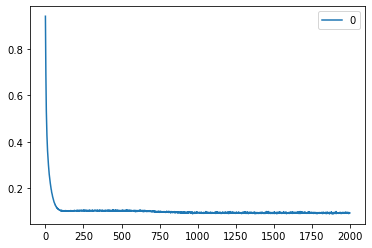

In [38]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(val_metric).plot()

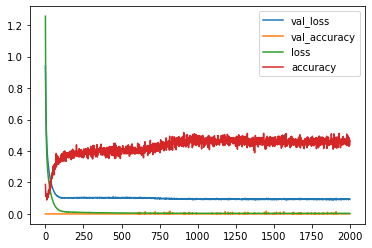

In [39]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

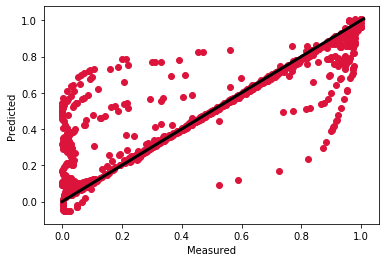

In [40]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

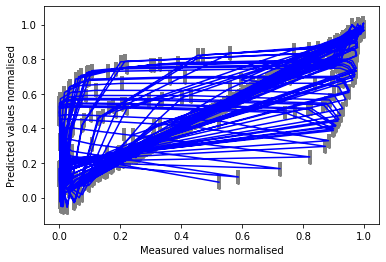

In [41]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [42]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [43]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

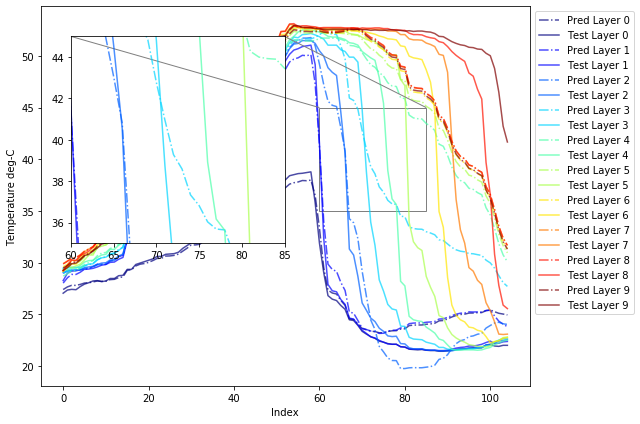

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f88e84eb2d0>)

In [44]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)